# **Market Timing Strategies using Kalman Filter**

*WorldQuant University, Msc Financial Engineering*

*author: rakeshsharma.pr@gmail.com*


# **Introduction**

In this section, I will explore the implementation of a Kalman filter in Python using the library Pykalman to forecast stock prices. The 2 stocks we are targeting are Ethereum and Bitcoin. As discussed in the literature review, research shows that Kalman filters have better outcomes for time series forecasting and can be used with various pricing algorithms, such as Heston, Bates, etc.

In [31]:
# installation of libraries

!pip install pykalman
!pip install plotly
!pip install statsmodels

In [32]:
# importing of libraries

import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm

# **Exploratory Data Analysis**

In [33]:
# crypto currencies of interest - Bitcoin and Ethereum

stock_list = ['BTC-USD', 'ETH-USD']

In [34]:
# extracting the stock price for the last 2 years
data = yf.download(stock_list, start='2022-09-01', end='2024-09-01')
data.head()

[*********************100%***********************]  2 of 2 completed


Price                         Adj Close                      Close  \
Ticker                          BTC-USD      ETH-USD       BTC-USD   
Date                                                                 
2022-09-01 00:00:00+00:00  20127.140625  1586.176758  20127.140625   
2022-09-02 00:00:00+00:00  19969.771484  1577.220459  19969.771484   
2022-09-03 00:00:00+00:00  19832.087891  1556.872681  19832.087891   
2022-09-04 00:00:00+00:00  19986.712891  1577.641602  19986.712891   
2022-09-05 00:00:00+00:00  19812.371094  1617.183228  19812.371094   

Price                                           High               \
Ticker                         ETH-USD       BTC-USD      ETH-USD   
Date                                                                
2022-09-01 00:00:00+00:00  1586.176758  20198.390625  1593.082764   
2022-09-02 00:00:00+00:00  1577.220459  20401.568359  1643.183228   
2022-09-03 00:00:00+00:00  1556.872681  20037.009766  1579.454346   
2022-09-04 00:00:00+00:00  1577.641602  19999.689453  1578.009277   
2022-09-05 00:00:00+00:00  1617.183228  20031.160156  1621.661377   

Price                               Low                       Open  \
Ticker                          BTC-USD      ETH-USD       BTC-USD   
Date                                                                 
2022-09-01 00:00:00+00:00  19653.968750  1520.188354  20050.498047   
2022-09-02 00:00:00+00:00  19814.765625  1551.877930  20126.072266   
2022-09-03 00:00:00+00:00  19698.355469  1541.672119  19969.718750   
2022-09-04 00:00:00+00:00  19636.816406  1543.698853  19832.470703   
2022-09-05 00:00:00+00:00  19673.046875  1559.781860  19988.789062   

Price                                        Volume               
Ticker                         ETH-USD      BTC-USD      ETH-USD  
Date                                                              
2022-09-01 00:00:00+00:00  1553.756348  30182031010  16434276817  
2022-09-02 00:00:00+00:00  1586.017944  29123998928  17708478709  
2022-09-03 00:00:00+00:00  1577.213745  23613051457   9516825994  
2022-09-04 00:00:00+00:00  1556.895874  25245861652   8884144998  
2022-09-05 00:00:00+00:00  1577.884033  28813460025  13060541168

In [35]:
data.describe()

Price      Adj Close                      Close                       High  \
Ticker       BTC-USD      ETH-USD       BTC-USD      ETH-USD       BTC-USD   
count     731.000000   731.000000    731.000000   731.000000    731.000000   
mean    37547.665388  2155.140591  37547.665388  2155.140591  38191.235700   
std     17690.953806   760.453241  17690.953806   760.453241  18088.636362   
min     15787.284180  1100.169800  15787.284180  1100.169800  16253.047852   
25%     23685.160156  1621.294556  23685.160156  1621.294556  24135.458008   
50%     29415.964844  1866.564209  29415.964844  1866.564209  29871.546875   
75%     56348.345703  2639.745850  56348.345703  2639.745850  57929.109375   
max     73083.500000  4066.445068  73083.500000  4066.445068  73750.070312   

Price                         Low                       Open               \
Ticker      ETH-USD       BTC-USD      ETH-USD       BTC-USD      ETH-USD   
count    731.000000    731.000000   731.000000    731.000000   731.000000   
mean    2198.338434  36811.021476  2107.786271  37493.767616  2153.848979   
std      780.759468  17228.145539   736.299033  17684.457403   760.660702   
min     1136.442627  15599.046875  1081.138184  15782.300781  1100.107178   
25%     1645.000488  23262.488281  1581.191528  23634.151367  1618.469055   
50%     1888.193726  29114.021484  1845.849243  29408.048828  1866.094238   
75%     2708.436523  54402.609375  2583.886230  55945.103516  2639.495850   
max     4092.284180  71334.093750  3936.627197  73079.375000  4066.690430   

Price         Volume                
Ticker       BTC-USD       ETH-USD  
count   7.310000e+02  7.310000e+02  
mean    2.493208e+10  1.110867e+10  
std     1.410378e+10  6.914517e+09  
min     5.331173e+09  2.081626e+09  
25%     1.469595e+10  6.297964e+09  
50%     2.160965e+10  9.407051e+09  
75%     3.143342e+10  1.412190e+10  
max     1.189925e+11  6.766813e+10

The data shows that open, close, High,low are correlated, we can check this in our plot

In [36]:
data.corr().style.background_gradient(cmap='coolwarm')

In [37]:
data.isnull().any()

Price      Ticker 
Adj Close  BTC-USD    False
           ETH-USD    False
Close      BTC-USD    False
           ETH-USD    False
High       BTC-USD    False
           ETH-USD    False
Low        BTC-USD    False
           ETH-USD    False
Open       BTC-USD    False
           ETH-USD    False
Volume     BTC-USD    False
           ETH-USD    False
dtype: bool

The dataset do not contain any null values

In [38]:
closing_data = data['Adj Close']['BTC-USD']
closing_data.head()

,BTC-USD
Date,
2022-09-01 00:00:00+00:00,20127.140625
2022-09-02 00:00:00+00:00,19969.771484
2022-09-03 00:00:00+00:00,19832.087891
2022-09-04 00:00:00+00:00,19986.712891
2022-09-05 00:00:00+00:00,19812.371094


In [39]:
closing_data = data['Adj Close']['ETH-USD']
closing_data.head()

,ETH-USD
Date,
2022-09-01 00:00:00+00:00,1586.176758
2022-09-02 00:00:00+00:00,1577.220459
2022-09-03 00:00:00+00:00,1556.872681
2022-09-04 00:00:00+00:00,1577.641602
2022-09-05 00:00:00+00:00,1617.183228


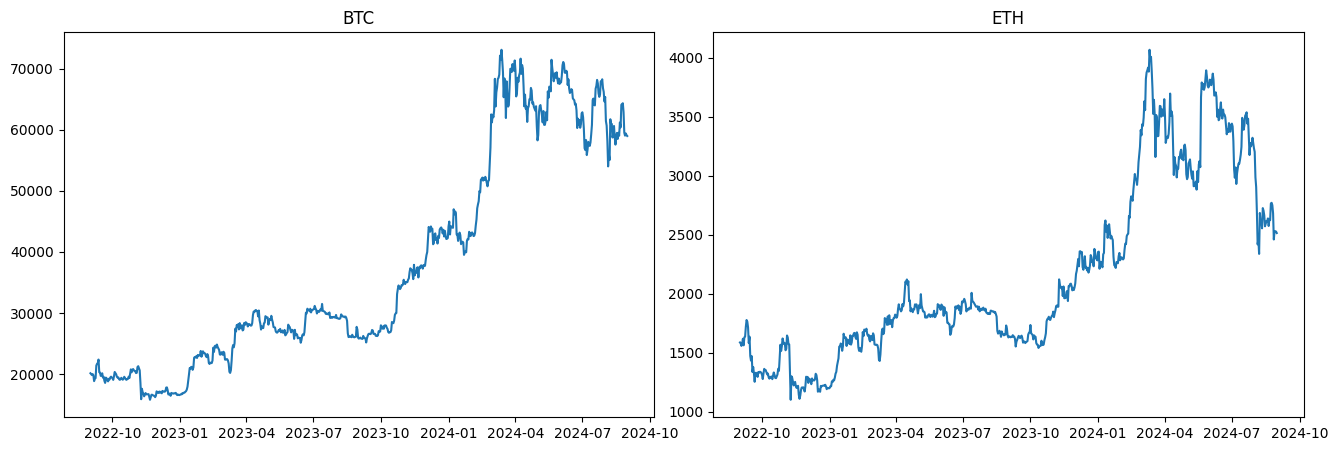

In [40]:
fig, axs =plt.subplots(1,2,figsize=(16, 5),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0].plot(data['Adj Close']['BTC-USD'])
axs[0].set_title('BTC')
axs[1].plot(data['Adj Close']['ETH-USD'])
axs[1].set_title('ETH')
plt.show()

(-0.5, 0.5)

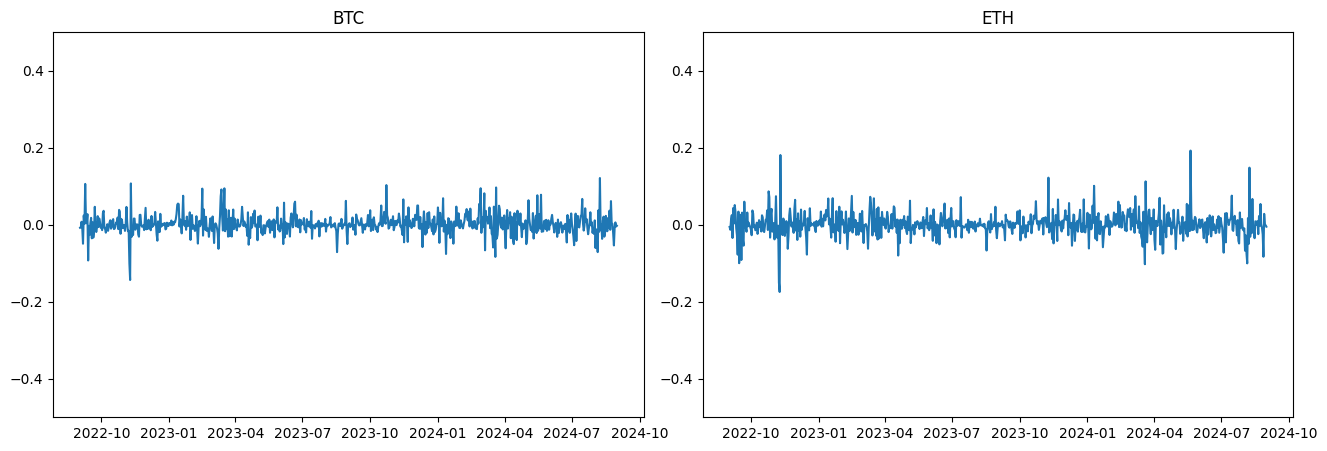

In [41]:

fig, axs = plt.subplots(1,2,figsize=(16,5),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
btc = data['Adj Close']['BTC-USD'].pct_change().dropna(axis=0)
axs[0].plot(btc)
axs[0].set_title('BTC')
axs[0].set_ylim([-0.5,0.5])

eth = data['Adj Close']['ETH-USD'].pct_change().dropna(axis=0)
axs[1].plot(eth)
axs[1].set_title('ETH')
axs[1].set_ylim([-0.5,0.5])

**OHLC plots - Price movements**
A candle stick plot helps us understand the spread between the prices of the crypto currency from the opening and closing price and identity the periods where they were coninuously on the rise.

In [42]:
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open']['BTC-USD'], high=data['High']['BTC-USD'],
                low=data['Low']['BTC-USD'], close=data['Close']['BTC-USD'])
                     ])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [43]:
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open']['ETH-USD'], high=data['High']['ETH-USD'],
                low=data['Low']['ETH-USD'], close=data['Close']['ETH-USD'])
                     ])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

**Understanding the Price shocks**

We can see how the rolling mean for various intervals looks like for our crypto data, we find that with increasing window size our data gets smoother and allows us to see the trend over which can be used for generating feature engineering. The shorter the window closer it is to the actual stock price and considers the price shocks.

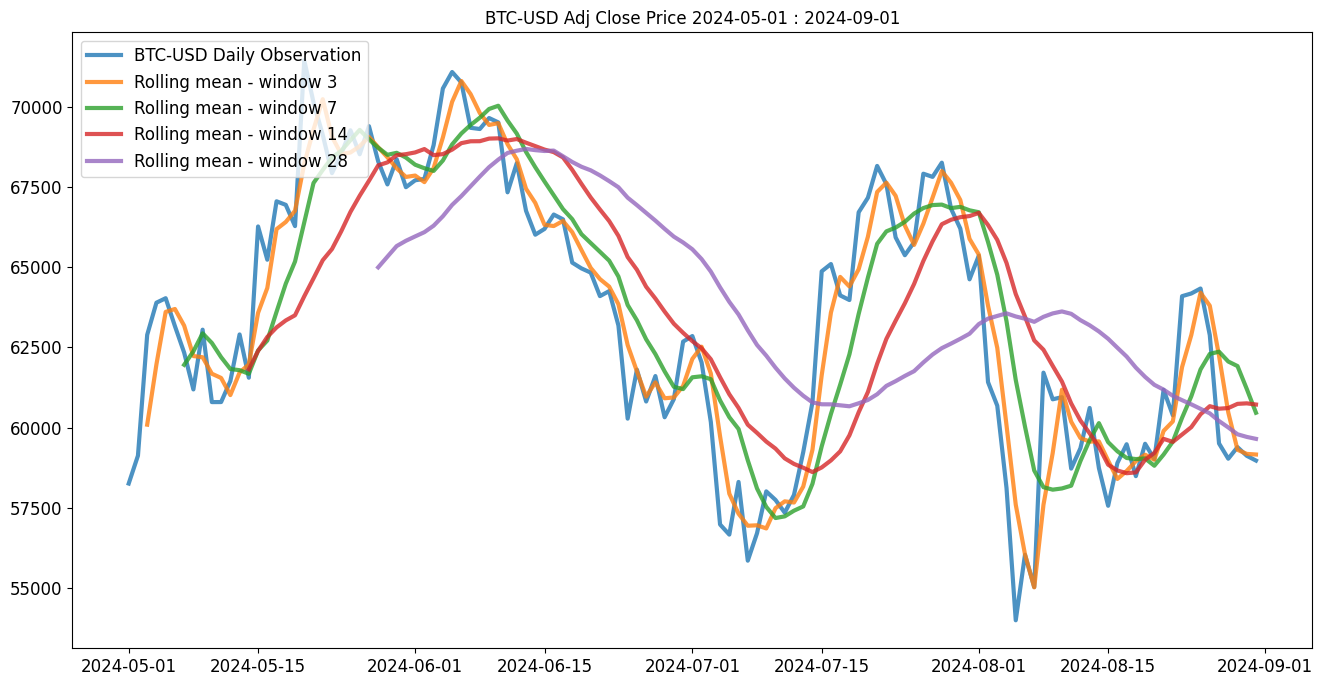

In [44]:
btc_closing_data = data['Adj Close']['BTC-USD'].loc['2024-05-01':'2024-09-01']
rolling_3d = btc_closing_data.rolling(window=3).mean()
rolling_7d = btc_closing_data.rolling(window=7).mean()
rolling_14d = btc_closing_data.rolling(window=14).mean()
rolling_28d = btc_closing_data.rolling(window=28).mean()


plt.figure(figsize=(16, 8))
plt.plot(btc_closing_data.index, btc_closing_data, lw=3, alpha=0.8, label='BTC-USD Daily Observation')
plt.plot(btc_closing_data.index, rolling_3d, lw=3, alpha=0.8,label='Rolling mean - window 3')
plt.plot(btc_closing_data.index, rolling_7d, lw=3, alpha=0.8,label='Rolling mean - window 7')
plt.plot(btc_closing_data.index, rolling_14d, lw=3, alpha=0.8,label='Rolling mean - window 14')
plt.plot(btc_closing_data.index, rolling_28d, lw=3, alpha=0.8,label='Rolling mean - window 28')

plt.title('BTC-USD Adj Close Price 2024-05-01 : 2024-09-01')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

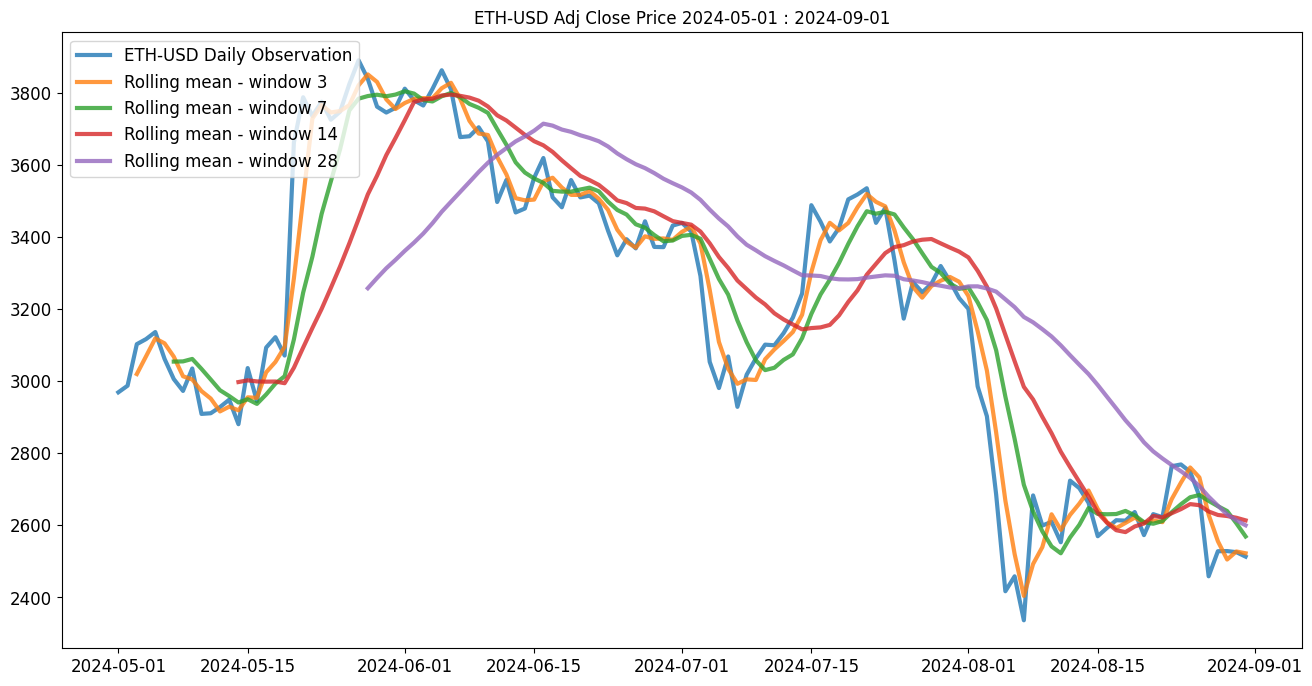

In [45]:
eth_closing_data = data['Adj Close']['ETH-USD'].loc['2024-05-01':'2024-09-01']
rolling_3d = eth_closing_data.rolling(window=3).mean()
rolling_7d = eth_closing_data.rolling(window=7).mean()
rolling_14d = eth_closing_data.rolling(window=14).mean()
rolling_28d = eth_closing_data.rolling(window=28).mean()


plt.figure(figsize=(16, 8))
plt.plot(eth_closing_data.index, eth_closing_data, lw=3, alpha=0.8, label='ETH-USD Daily Observation')
plt.plot(eth_closing_data.index, rolling_3d, lw=3, alpha=0.8,label='Rolling mean - window 3')
plt.plot(eth_closing_data.index, rolling_7d, lw=3, alpha=0.8,label='Rolling mean - window 7')
plt.plot(eth_closing_data.index, rolling_14d, lw=3, alpha=0.8,label='Rolling mean - window 14')
plt.plot(eth_closing_data.index, rolling_28d, lw=3, alpha=0.8,label='Rolling mean - window 28')

plt.title('ETH-USD Adj Close Price 2024-05-01 : 2024-09-01')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

Ethereum rolling means are lot steeper than BTC, in the further sections we will do the causality tests to see autocorrelation.

**Understanding the Volume Shocks**

Positive volume shocks can be leveraged to improve returns and it is signifcant for volume based trading in crypto. Trading strategists can buy stocks on a positive volume jump and sell stocks on volume downsides to make profit over a period of time. A shock is defined as the increase or decrease in the volume comapred to the 12-month average.
Compared to the rolling mean for 28 days, daily volume shows significant upward spikes compared to downfalls.

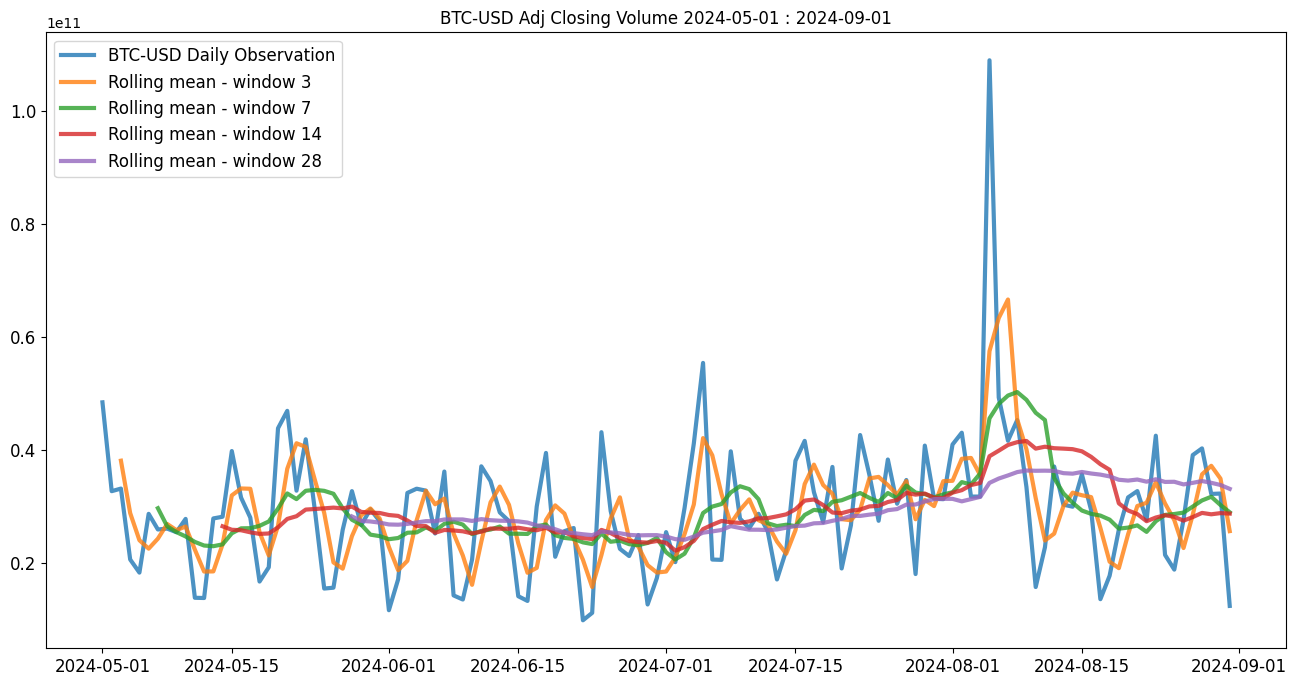

In [46]:
btc_closing_data = data['Volume']['BTC-USD'].loc['2024-05-01':'2024-09-01']
rolling_3d = btc_closing_data.rolling(window=3).mean()
rolling_7d = btc_closing_data.rolling(window=7).mean()
rolling_14d = btc_closing_data.rolling(window=14).mean()
rolling_28d = btc_closing_data.rolling(window=28).mean()


plt.figure(figsize=(16, 8))
plt.plot(btc_closing_data.index, btc_closing_data, lw=3, alpha=0.8, label='BTC-USD Daily Observation')
plt.plot(btc_closing_data.index, rolling_3d, lw=3, alpha=0.8,label='Rolling mean - window 3')
plt.plot(btc_closing_data.index, rolling_7d, lw=3, alpha=0.8,label='Rolling mean - window 7')
plt.plot(btc_closing_data.index, rolling_14d, lw=3, alpha=0.8,label='Rolling mean - window 14')
plt.plot(btc_closing_data.index, rolling_28d, lw=3, alpha=0.8,label='Rolling mean - window 28')

plt.title('BTC-USD Adj Closing Volume 2024-05-01 : 2024-09-01')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

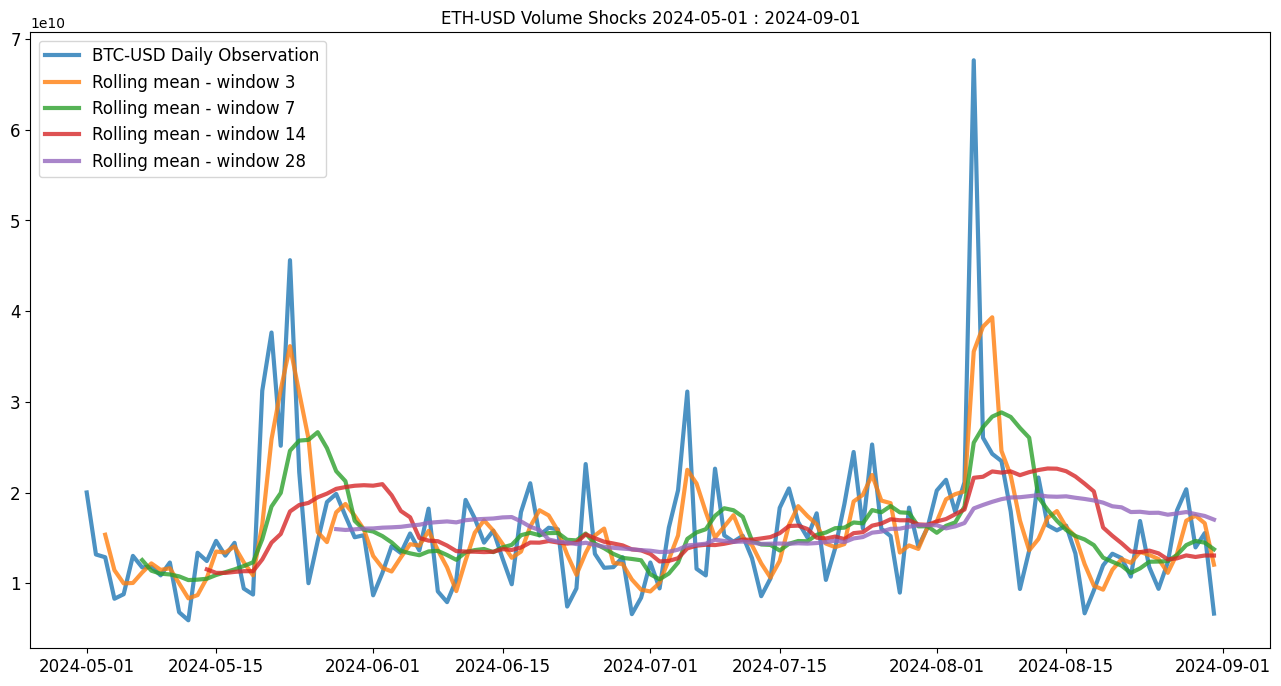

In [47]:
btc_closing_data = data['Volume']['ETH-USD'].loc['2024-05-01':'2024-09-01']
rolling_3d = btc_closing_data.rolling(window=3).mean()
rolling_7d = btc_closing_data.rolling(window=7).mean()
rolling_14d = btc_closing_data.rolling(window=14).mean()
rolling_28d = btc_closing_data.rolling(window=28).mean()


plt.figure(figsize=(16, 8))
plt.plot(btc_closing_data.index, btc_closing_data, lw=3, alpha=0.8, label='BTC-USD Daily Observation')
plt.plot(btc_closing_data.index, rolling_3d, lw=3, alpha=0.8,label='Rolling mean - window 3')
plt.plot(btc_closing_data.index, rolling_7d, lw=3, alpha=0.8,label='Rolling mean - window 7')
plt.plot(btc_closing_data.index, rolling_14d, lw=3, alpha=0.8,label='Rolling mean - window 14')
plt.plot(btc_closing_data.index, rolling_28d, lw=3, alpha=0.8,label='Rolling mean - window 28')

plt.title('ETH-USD Volume Shocks 2024-05-01 : 2024-09-01')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

**Check for Autocorrelation and Partial autocorrelation**

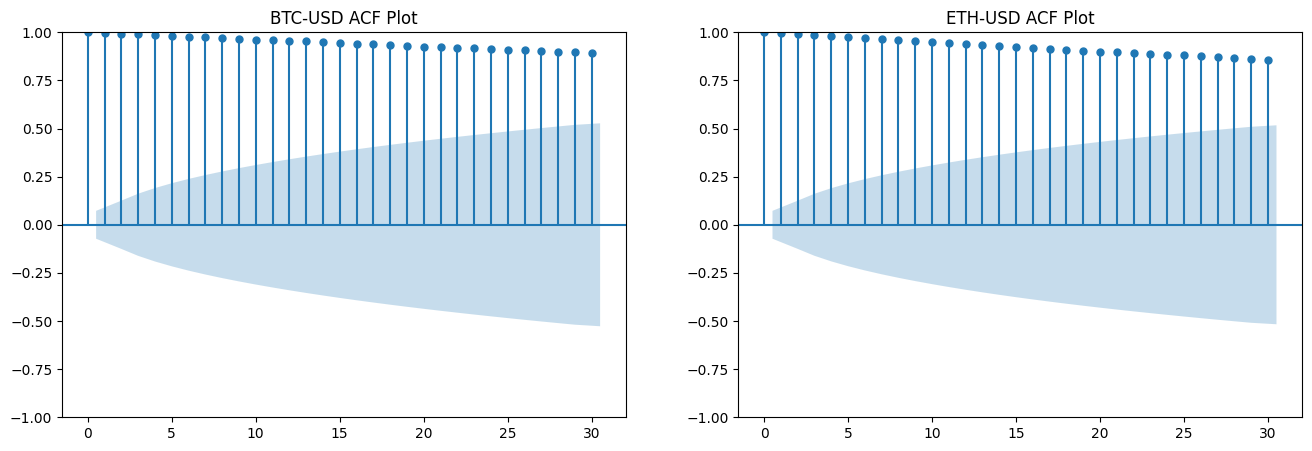

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

btc_data = data['Adj Close']['BTC-USD']
sm.graphics.tsa.plot_acf(btc_data.values.squeeze(), lags=30, ax=ax1, title="BTC-USD ACF Plot")

eth_data = data['Adj Close']['ETH-USD']
sm.graphics.tsa.plot_acf(eth_data.values.squeeze(), lags=30, ax=ax2, title="ETH-USD ACF Plot")
plt.show()

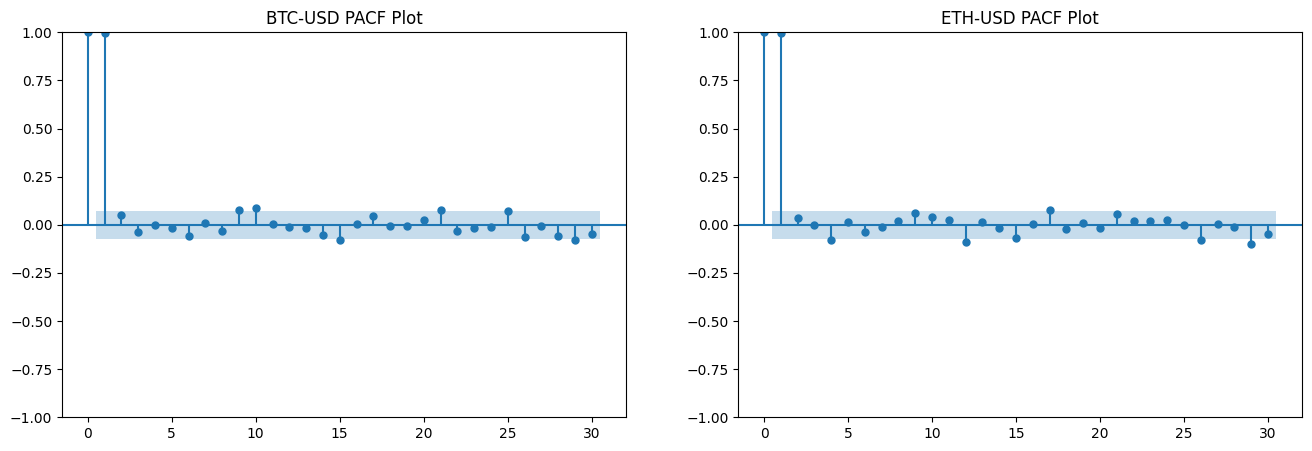

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

btc_data = data['Adj Close']['BTC-USD']
sm.graphics.tsa.plot_pacf(btc_data.values.squeeze(), lags=30, ax=ax1, title="BTC-USD PACF Plot")

eth_data = data['Adj Close']['ETH-USD']
sm.graphics.tsa.plot_pacf(eth_data.values.squeeze(), lags=30, ax=ax2, title="ETH-USD PACF Plot")
plt.show()

The plot shows significant autocorrelation, the previous value of the currenty determines days closing price. From the PACF plot it is clear that price of certain period of time is correlated than others, say for example price on day 4, 9, 12, 15 etc.

# **Exploring Kalman Filter**

Getting started with Kalman Filters for the data, we will be using the algorithms implementation in pykalman. Let us do the Kalman smoothing and filtering methods to remove the trend here. Stock price by nature is very noisy and with an underlying trend. The identification of this trend can be useful in many ways and can also be used as a feature for stock price forecasting using ARIMA, Linear Regression or any other methods.

In [50]:
# initializing kalman filters

from pykalman import KalmanFilter
import numpy as np


kalmanFilter = KalmanFilter(transition_matrices = [1],
              observation_matrices = [1],
              initial_state_mean = 0,
              initial_state_covariance = 1,
              observation_covariance=1,
              transition_covariance=.0001)

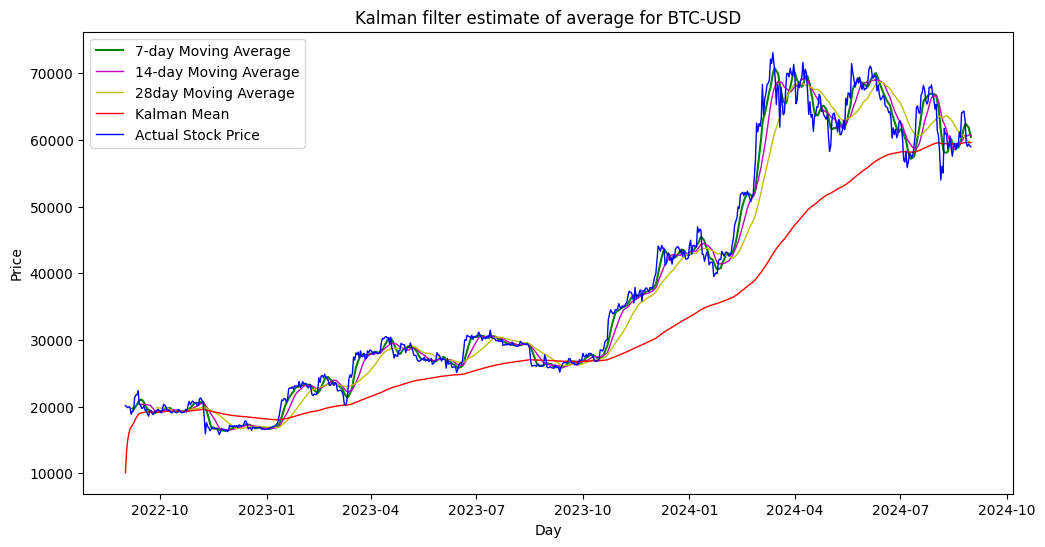

In [51]:
# using Kalman Filters for BTC-USD

stock_price = data['Adj Close']['BTC-USD']
mean, cov = kalmanFilter.filter(stock_price)
kalman_mean = pd.Series(mean.flatten(), index=stock_price.index)



rolling_3d = stock_price.rolling(window=3).mean()
rolling_7d = stock_price.rolling(window=7).mean()
rolling_14d = stock_price.rolling(window=14).mean()
rolling_28d = stock_price.rolling(window=28).mean()

plt.figure(figsize=(12,6))
plt.plot(rolling_7d,'-g',lw=1.5)
plt.plot(rolling_14d, 'm', lw=1)
plt.plot(rolling_28d, 'y', lw=1)
plt.plot(kalman_mean, 'r', lw=1)
plt.plot(stock_price, 'b', lw=1)
plt.title('Kalman filter estimate of average for BTC-USD')
plt.legend(['7-day Moving Average', '14-day Moving Average', '28day Moving Average', 'Kalman Mean', 'Actual Stock Price'])
plt.xlabel('Day')
plt.ylabel('Price');

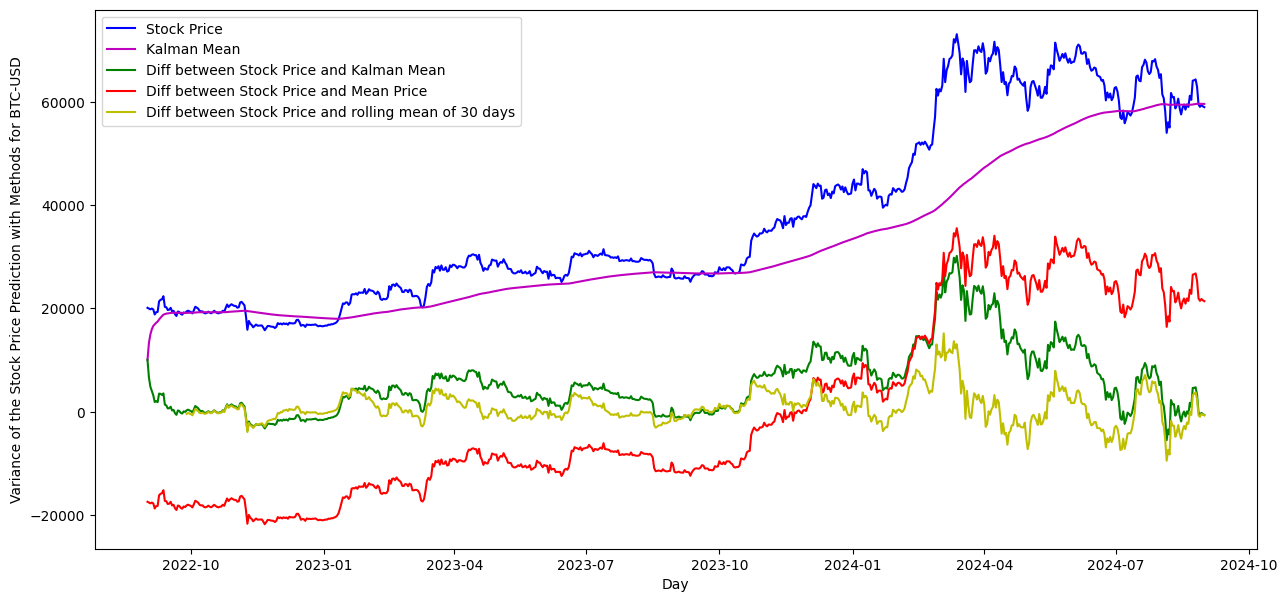

In [52]:
plt.figure(figsize=(15,7))
plt.plot(stock_price ,'b',lw=1.5)
plt.plot(kalman_mean ,'m',lw=1.5)
plt.plot(stock_price - kalman_mean,'-g',lw=1.5)
plt.plot(stock_price - stock_price.mean() ,'r',lw=1.5)
plt.plot(stock_price - rolling_28d ,'y',lw=1.5)
plt.legend(['Stock Price', 'Kalman Mean', 'Diff between Stock Price and Kalman Mean', 'Diff between Stock Price and Mean Price',  'Diff between Stock Price and rolling mean of 30 days'])
plt.xlabel('Day')
plt.ylabel('Variance of the Stock Price Prediction with Methods for BTC-USD');

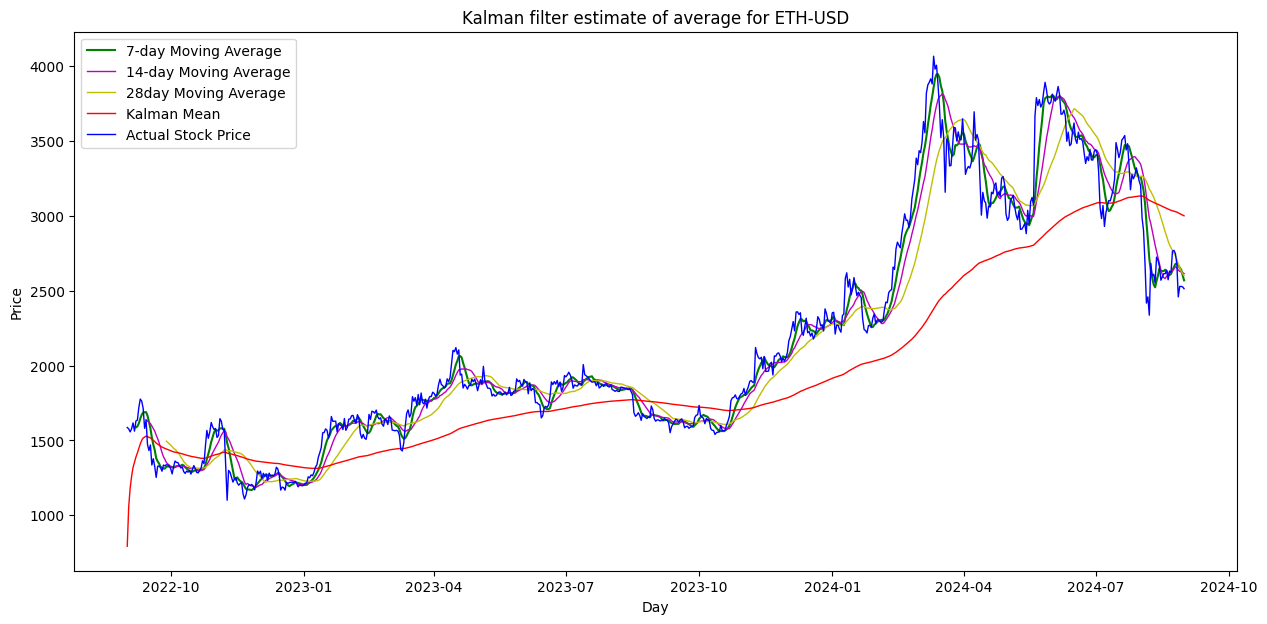

In [53]:
kalmanFilter = KalmanFilter(transition_matrices = [1],
              observation_matrices = [1],
              initial_state_mean = 0,
              initial_state_covariance = 1,
              observation_covariance=1,
              transition_covariance=.0001)

stock_price = data['Adj Close']['ETH-USD']
mean, cov = kalmanFilter.filter(stock_price)
kalman_mean = pd.Series(mean.flatten(), index=stock_price.index)



rolling_3d = stock_price.rolling(window=3).mean()
rolling_7d = stock_price.rolling(window=7).mean()
rolling_14d = stock_price.rolling(window=14).mean()
rolling_28d = stock_price.rolling(window=28).mean()

plt.figure(figsize=(15,7))
plt.plot(rolling_7d,'-g',lw=1.5)
plt.plot(rolling_14d, 'm', lw=1)
plt.plot(rolling_28d, 'y', lw=1)
plt.plot(kalman_mean, 'r', lw=1)
plt.plot(stock_price, 'b', lw=1)
plt.title('Kalman filter estimate of average for ETH-USD')
plt.legend(['7-day Moving Average', '14-day Moving Average', '28day Moving Average', 'Kalman Mean', 'Actual Stock Price'])
plt.xlabel('Day')
plt.ylabel('Price');

From the kalman Filter for Bitcoin it can be seen that it produces much more smooth signal than others and is more generalised than the rolling window prediction. Kalman fiklter helps in separating the noise from the signals and can be used for prediction

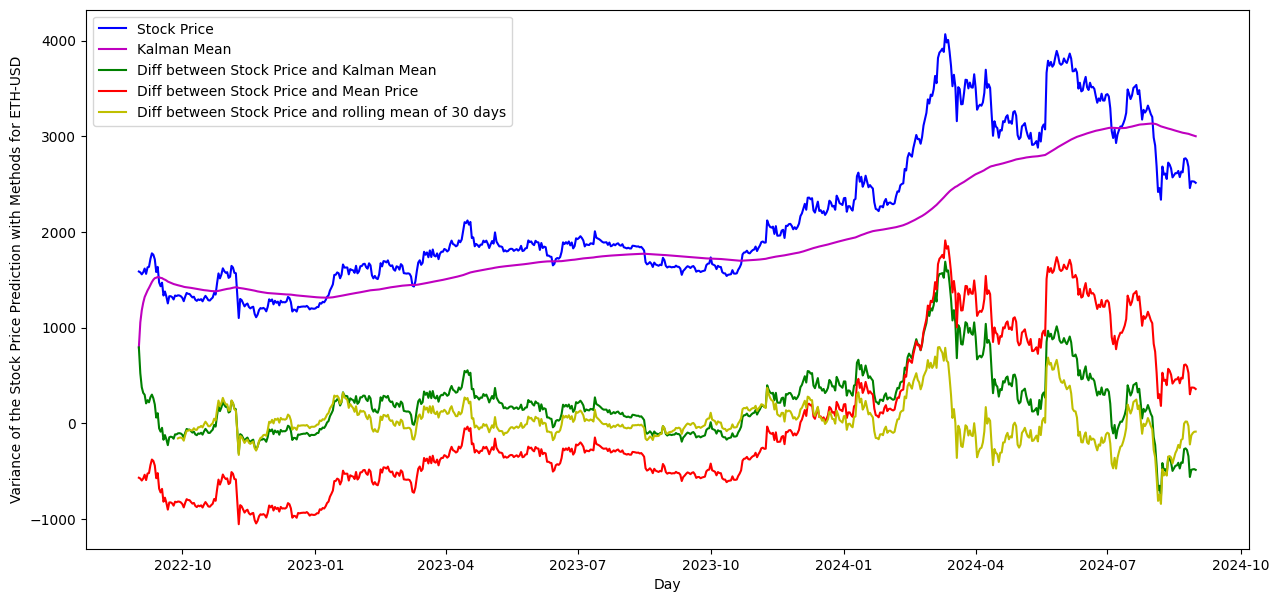

In [54]:
plt.figure(figsize=(15,7))
plt.plot(stock_price ,'b',lw=1.5)
plt.plot(kalman_mean ,'m',lw=1.5)
plt.plot(stock_price - kalman_mean,'-g',lw=1.5)
plt.plot(stock_price - stock_price.mean() ,'r',lw=1.5)
plt.plot(stock_price - rolling_28d ,'y',lw=1.5)
plt.legend(['Stock Price', 'Kalman Mean', 'Diff between Stock Price and Kalman Mean', 'Diff between Stock Price and Mean Price',  'Diff between Stock Price and rolling mean of 30 days'])
plt.xlabel('Day')
plt.ylabel('Variance of the Stock Price Prediction with Methods for ETH-USD');

Kalman Filters gives a time-evolving mean and shows fluctuations with time than the and difference stays closer to 0 compared to the other steps such as rolling mean and static mean. Such updated mean for each time point could help us manage aggressive trading strategies.

In the below section we will using Kalman Filter update method to do stock price forecasts for each day using the previous data as the prior and will keep on update the price on based on the daily available actual price like a dynamic system.

In [55]:
kalmanFilter = KalmanFilter(transition_matrices = [1],
              observation_matrices = [1],
              initial_state_mean = 0,
              initial_state_covariance = 1,
              observation_covariance=1,
              transition_covariance=.0001)

mean, cov = kalmanFilter.em(stock_price[:-10], n_iter=10).smooth(stock_price[:-10])

next_means = []
next_covs = []
next_mean = mean[-1]
next_cov = cov[-1]
for i in range(10):
  next_mean, next_cov = kalmanFilter.filter_update(next_mean, next_cov, stock_price[-(10 - i * 1)])
  next_means.append(next_mean[0])
  next_covs.append(next_cov[0])

<ipython-input-55-f8125cd5b091>:15: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [56]:
next_means # forecasted means

[2626.221519553881,
 2651.605650741153,
 2673.235844934905,
 2687.17835683635,
 2686.106289901089,
 2644.3496187437095,
 2623.0591466956967,
 2605.747788144818,
 2591.0699890569754,
 2576.8053086951118]

In [57]:
# replacing the forecasted price for the last 10 days
forecasted_price = pd.DataFrame(data=np.concatenate([stock_price[:-10].values, next_means]),
                  index=stock_price.index)

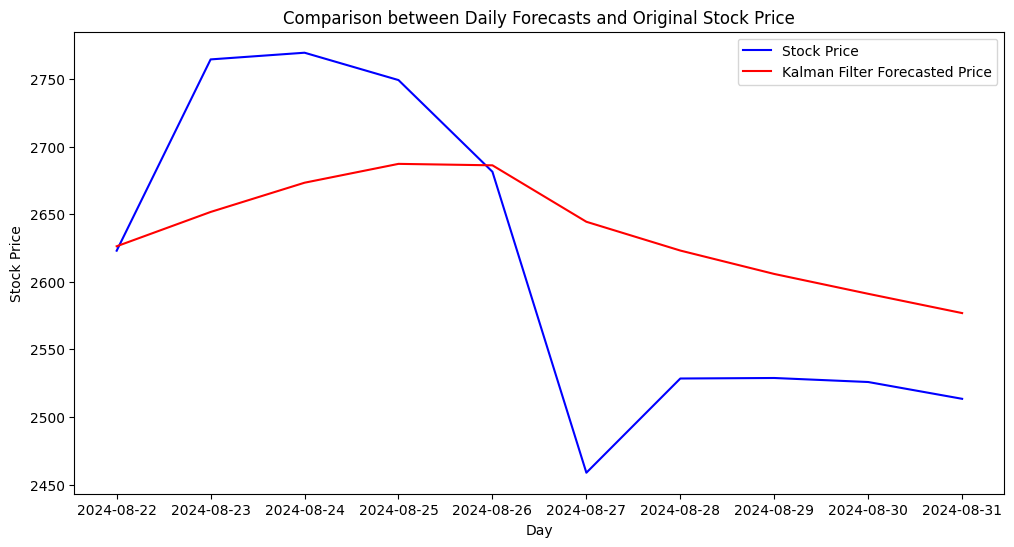

In [58]:
plt.figure(figsize=(12,6))
plt.plot(stock_price[len(stock_price)-10:] ,'b',lw=1.5)
plt.plot(forecasted_price[len(stock_price)-10:] ,'r',lw=1.5)
plt.legend(['Stock Price', 'Kalman Filter Forecasted Price'])
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Comparison between Daily Forecasts and Original Stock Price');